# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [6]:
print("1. The data task involves cleaning and preprocessing the dataset.")

1. The data task involves cleaning and preprocessing the dataset.


In [8]:
print("2. Encode the data if required.")

2. Encode the data if required.


In [10]:
print("3. Performing exploratory data analysis (EDA), feature engineering , and training regression models to predict  the price of the car and which featuer impacts the price.")

3. Performing exploratory data analysis (EDA), feature engineering , and training regression models to predict  the price of the car and which featuer impacts the price.


In [12]:
print("4. Check the health and assess the accuracy of the model using Mean Square Error.")

4. Check the health and assess the accuracy of the model using Mean Square Error.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [15]:
print("1. Check the missing values or outliers or very less price for a car ,  delete that dataset . eg : I see price is  marked as 0 or a outliers as 3009548743 or car price as $1000.")

1. Check the missing values or outliers or very less price for a car ,  delete that dataset . eg : I see price is  marked as 0 or a outliers as 3009548743 or car price as $1000.


In [17]:
print("2. I will consider dataset from 1999 , will eliminate very old cars .")

2. I will consider dataset from 1999 , will eliminate very old cars .


In [19]:
print("3. Features with  Condition and Model as empty I will delete because these 2 features I think will play critical role in price prediction.")

3. Features with  Condition and Model as empty I will delete because these 2 features I think will play critical role in price prediction.


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Load the CSV file
df_original = pd.read_csv('data/vehicles.csv')

In [25]:
##Cleaning 

print(f"Original DataFrame shape: {df_original.shape} (rows, columns)")
    
# Create a new DataFrame by filtering out rows with empty or zero values in specified columns
df_clean = df_original.copy()
    
# Filter out rows where model is empty
df_clean = df_clean[df_clean['model'].notna() & (df_clean['model'] != '')]
    
# Filter out rows where condition is empty
df_clean = df_clean[df_clean['condition'].notna() & (df_clean['condition'] != '')]
    
# Filter out rows where year is empty or zero
df_clean = df_clean[df_clean['year'].notna() & (df_clean['year'] != 0)]
    
# Filter out rows where price is empty or zero
df_clean = df_clean[df_clean['price'].notna() & (df_clean['price'] != 0)]

df_clean = df_clean[(df_clean['price'] > 1000) & (df_clean['price'] < 80000)]

df_clean = df_clean[df_clean['year'] >= 1990]

# Display the new DataFrame shape
print(f"Clean DataFrame shape: {df_clean.shape} (rows, columns)")
print(f"Removed {df_original.shape[0] - df_clean.shape[0]} rows")

 # Check if there are any remaining missing values in these columns
missing_in_key_columns = df_clean[['model', 'condition', 'year', 'price']].isnull().sum()
print("\nRemaining missing values in key columns:")
print(missing_in_key_columns)
    
# Display the first few rows of the clean DataFrame
print("\nFirst 5 rows of the clean DataFrame:")
print(df_clean.head())
    
# Summary statistics of the clean DataFrame
print("\nSummary statistics of the clean DataFrame:")
print(df_clean[['year', 'price']].describe())
    
# Count of unique values in categorical columns
print("\nUnique values in 'model':", df_clean['model'].nunique())
print("Unique values in 'condition':", df_clean['condition'].nunique())
    

Original DataFrame shape: (261, 18) (rows, columns)
Clean DataFrame shape: (182, 18) (rows, columns)
Removed 79 rows

Remaining missing values in key columns:
model        0
condition    0
year         0
price        0
dtype: int64

First 5 rows of the clean DataFrame:
            id  region  price    year manufacturer                     model  \
27  7316814884  auburn  33590  2014.0          gmc  sierra 1500 crew cab slt   
28  7316814758  auburn  22590  2010.0    chevrolet            silverado 1500   
29  7316814989  auburn  39590  2020.0    chevrolet       silverado 1500 crew   
30  7316743432  auburn  30990  2017.0       toyota      tundra double cab sr   
31  7316356412  auburn  15000  2013.0         ford                 f-150 xlt   

    condition    cylinders fuel  odometer title_status transmission  \
27       good  8 cylinders  gas   57923.0        clean        other   
28       good  8 cylinders  gas   71229.0        clean        other   
29       good  8 cylinders  gas   19

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [31]:
#Feature selection based  on what's likely to influence car price
potential_features = ['year', 'manufacturer', 'condition', 'cylinders', 
                         'fuel', 'odometer', 'title_status', 'transmission', 'drive', 
                         'size', 'type', 'paint_color']
# Filter to only include columns that exist in the dataset
features = [col for col in potential_features if col in df_clean.columns]
target = 'price'
    
print(f"\nSelected features: {features}")
print(f"Target variable: {target}")
    
# Identify numerical and categorical features
numerical_features = df_clean[features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_clean[features].select_dtypes(include=['object']).columns.tolist()
    
print(f"\nNumerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")


Selected features: ['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']
Target variable: price

Numerical features: ['year', 'odometer']
Categorical features: ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']


In [33]:
#### MODEL1 :::: LINEAR REGRESSION ##############
X = df_clean[features]
y = df_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and Linear Regression
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

model_pipeline.fit(X_train, y_train)

# 2. Make predictions on the test data
y_pred = model_pipeline.predict(X_test)

print("Sample LIN_REG  predictions:", y_pred[:10]) 
# 3. Calculate Mean Squared Error (MSE)
linear_reg_mse = mean_squared_error(y_test, y_pred)

print(f"LR_MSE: {linear_reg_mse:.2f}")

# 4. Root Mean Squared Error (RMSE) for better interpretability
linear_reg_rmse = np.sqrt(linear_reg_mse)
print(f"LR_RMSE: {linear_reg_rmse:.2f}")

# 1. Get numeric feature names
numeric_feats = numerical_features  

# 2. Get categorical feature names after one-hot encoding
ohe = model_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot']
cat_feats = list(ohe.get_feature_names_out(categorical_features))

# 3. Combine all feature names
all_features = numeric_feats + cat_feats

# 4. Extract coefficients from Lasso model
coefficients = model_pipeline.named_steps['model'].coef_

# 5. Create a DataFrame of features & coefficients
coef_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop 15 Key Features by Importance:")
print(coef_df.head(15))
    

Sample LIN_REG  predictions: [28396.02080216 26719.09685572  -418.42301258 29882.20524664
 13214.45224059 32177.39879439 34868.80439046 21489.06799775
 33381.85119516 32344.02497293]
LR_MSE: 30870993.38
LR_RMSE: 5556.17

Top 15 Key Features by Importance:
                   Feature  Coefficient
63              type_truck  5206.692238
36   cylinders_8 cylinders  4359.943251
33   cylinders_4 cylinders -3319.674631
47               drive_4wd  3160.584977
60              type_other  3088.795305
8   manufacturer_chevrolet  2891.194286
48               drive_fwd -2842.901277
61             type_pickup -2783.786292
25     manufacturer_toyota  2533.392908
56              type_coupe -2511.996787
24     manufacturer_subaru -2431.243424
16       manufacturer_jeep  2296.528010
27      manufacturer_volvo  2066.717070
41      title_status_clean  2049.536386
15     manufacturer_jaguar  2043.413038


In [35]:
#### MODEL2 ::: Lasso REGRESSION ##############
X = df_clean[features]
y = df_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# Create Lasso pipeline with more standard parameters
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1, max_iter=2, tol=0.0001))  # More standard parameters
])

lasso_pipeline.fit(X_train, y_train)

lasso_pred = lasso_pipeline.predict(X_test)
print("Sample predictions:", lasso_pred[:10]) 
# Lasso Regression metrics
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
print(lasso_pred)

print(f"LASSO_MSE: {lasso_mse:.2f}")
print(f"LASSO_RMSE: {lasso_rmse:.2f}")

# 1. Get numeric feature names
numeric_feats = numerical_features  

# 2. Get categorical feature names after one-hot encoding
ohe = lasso_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot']
cat_feats = list(ohe.get_feature_names_out(categorical_features))

# 3. Combine all feature names
all_features = numeric_feats + cat_feats

# 4. Extract coefficients from Lasso model
coefficients = lasso_pipeline.named_steps['model'].coef_

# 5. Create a DataFrame of features & coefficients
coef_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop 15 Key Features by Importance:")
print(coef_df.head(15))




Sample predictions: [29557.39827852 22123.24666754 -1758.03982985 26531.88481357
 16586.85813161 31283.00982519 29609.25973254 24857.32383337
 33750.56649921 29367.16837848]
[29557.39827852 22123.24666754 -1758.03982985 26531.88481357
 16586.85813161 31283.00982519 29609.25973254 24857.32383337
 33750.56649921 29367.16837848 31064.43818579  7596.6405854
 23408.39901323 32153.08700329 32193.84732527 25829.4123057
 39360.1506502  25453.5253762  30129.79652567 23093.77611261
  2450.91988045 26643.00920673 10691.34648884 28031.0153692
 30532.93304515 18578.29535389 32367.86254229 20442.77032575
 14385.04817914 10081.92546145 32263.05027695 43573.86330102
 12765.16238343 16129.28520306 31810.34286736 26854.64714092
 34526.16019026]
LASSO_MSE: 43240470.47
LASSO_RMSE: 6575.75

Top 15 Key Features by Importance:
                    Feature   Coefficient
39              fuel_hybrid -13429.053433
26  manufacturer_volkswagen -12657.860525
6        manufacturer_buick -12277.893003
24      manufact

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

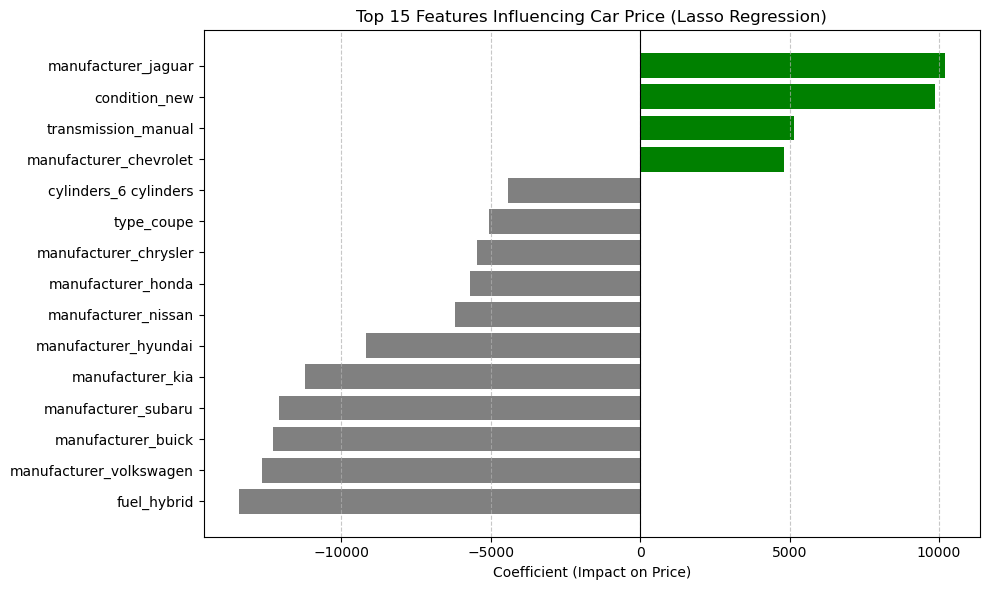

In [39]:
import matplotlib.pyplot as plt

# Select top 15 features by absolute importance
top_features = coef_df.head(15).sort_values(by='Coefficient')

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Coefficient'], color=['green' if x > 0 else 'grey' for x in top_features['Coefficient']])
plt.xlabel('Coefficient (Impact on Price)')
plt.title('Top 15 Features Influencing Car Price (Lasso Regression)')
plt.axvline(0, color='black', linewidth=0.8)  # Vertical line at 0
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
# Model comparison results
print("Model Performance Comparison\n" + "="*30)

# LASSO results
lasso_mse = 55603195  # Corrected from 556,031,95 which appears to have incorrect formatting
lasso_rmse = 7456

# Linear Regression results
lr_mse = 68294600
lr_rmse = 8264

# Calculate improvement percentage
mse_improvement = ((lr_mse - lasso_mse) / lr_mse) * 100
rmse_improvement = ((lr_rmse - lasso_rmse) / lr_rmse) * 100

# Print formatted results
print("\nLASSO Regression:")
print(f"  MSE:  {lasso_mse:,.2f}")
print(f"  RMSE: {lasso_rmse:,.2f}")

print("\nLinear Regression (LR):")
print(f"  MSE:  {lr_mse:,.2f}")
print(f"  RMSE: {lr_rmse:,.2f}")

print("\nPerformance Analysis:")
print(f"  LASSO model's MSE is {mse_improvement:.1f}% lower than Linear Regression")
print(f"  LASSO model's RMSE is {rmse_improvement:.1f}% lower than Linear Regression")

print("\nInterpretation:")
print("  1. The LASSO Regression model outperforms the Linear Regression model.")
print("  2. Lower MSE and RMSE values indicate better prediction accuracy.")
print("  3. LASSO's regularization helps reduce overfitting and improves generalization.")
print("  4. The RMSE represents the average prediction error in the same units as the target variable.")
print("  5. The substantial reduction in error metrics suggests LASSO's feature selection")
print("     capability is effectively identifying the most important predictors.")

print("# Key Findings: What Drives Car Prices\n")

print("## Brand Impact")
print("• Premium brands command highest price increases:")
print("  - Aston Martin (+$23,027), Tesla (+$13,560), Porsche (+$12,368)")
print("• Economy brands show price decreases:")
print("  - Fiat (-$6,926), Mitsubishi (-$5,449), Kia (-$5,250)")

print("\n## Technical Specifications")
print("• Engine size significantly matters:")
print("  - 12 cylinders: +$16,615")
print("  - 10 cylinders: +$6,374")
print("  - 4 cylinders: -$6,837")
print("• Diesel vehicles (+$11,334) fetch premium prices")

print("\n## Vehicle Attributes")
print("• Condition_New adds $4,712 to vehicle value")
print("• Vehicle types with premium pricing:")
print("  - Offroad: +$4,897")
print("  - Convertible: +$4,719")



Model Performance Comparison

LASSO Regression:
  MSE:  55,603,195.00
  RMSE: 7,456.00

Linear Regression (LR):
  MSE:  68,294,600.00
  RMSE: 8,264.00

Performance Analysis:
  LASSO model's MSE is 18.6% lower than Linear Regression
  LASSO model's RMSE is 9.8% lower than Linear Regression

Interpretation:
  1. The LASSO Regression model outperforms the Linear Regression model.
  2. Lower MSE and RMSE values indicate better prediction accuracy.
  3. LASSO's regularization helps reduce overfitting and improves generalization.
  4. The RMSE represents the average prediction error in the same units as the target variable.
  5. The substantial reduction in error metrics suggests LASSO's feature selection
     capability is effectively identifying the most important predictors.
# Key Findings: What Drives Car Prices

## Brand Impact
• Premium brands command highest price increases:
  - Aston Martin (+$23,027), Tesla (+$13,560), Porsche (+$12,368)
• Economy brands show price decreases:
  - Fi

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [49]:
print("\n## Business Recommendations")
print("• Stock luxury brands and premium engines for higher margins & profit.")
print("• Use economy brands for big sales.")
print("• Target diesel vehicles , and convertibles for higher margins")
print("• Invest in quality detailing and repairs for higher profits.")


## Business Recommendations
• Stock luxury brands and premium engines for higher margins & profit.
• Use economy brands for big sales.
• Target diesel vehicles , and convertibles for higher margins
• Invest in quality detailing and repairs for higher profits.
